In [13]:
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr

In [14]:
!ls -lrt  /resstore/b0154/Data/phydrm/PURE-SW/*.nc

zsh:1: no matches found: /resstore/b0154/Data/phydrm/PURE-SW/*.nc


In [15]:
# nh_file = '/resstore/b0154/Data/phydrm/PURE-SW/mar15-20_2015_ampere_nh.nc' 
nh_file = '../data/mar15-20_2015_ampere_nh.nc'
sh_file = '/resstore/b0154/Data/phydrm/PURE-SWmar15-20_2015_ampere_sh.nc'

In [16]:
nhds = xr.open_dataset(nh_file)

In [17]:
nhds

<xarray.Dataset>
Dimensions:      (lon: 37, mlt: 37, lat: 25, time: 1728)
Coordinates:
  * lon          (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
  * mlt          (mlt) timedelta64[ns] 00:00:00 ... 1 days 00:00:00
  * lat          (lat) float64 90.0 88.33 86.67 85.0 ... 55.0 53.33 51.67 50.0
  * time         (time) int32 1 2 3 4 5 6 7 8 ... 282 283 284 285 286 287 288
Data variables: (12/31)
    year         (time) int32 ...
    month        (time) int32 ...
    day          (time) int32 ...
    jday         (time) int32 ...
    hour         (time) int32 ...
    minute       (time) int32 ...
    ...           ...
    JEN          (time, lat, lon) float64 ...
    JEE          (time, lat, lon) float64 ...
    FAC          (time, lat, lon) float64 ...
    JOULE        (time, lat, lon) float64 ...
    EQCURR       (time, lat, lon) float64 ...
    CURRPOT      (time, lat, lon) float64 ...
Attributes:
    history:                   Tue Dec 26 17:11:01 2017: ncrcat mar15_2015_am...
    nco_openmp_thread_number:  1

In [18]:
time = nhds.jday.astype(float) + nhds.ut.astype(float)/(60.*60.*24.*1.e9)

In [19]:
nhds['time'] = time

In [20]:
itime = 750
print('day:', nhds.day.isel(time=itime).values)
print('hour', nhds.hour.isel(time=itime).values)
print('minute', nhds.minute.isel(time=itime).values)

day: 17
hour 14
minute 30


<xarray.DataArray 'pcp' ()>
array(137463.84375)
Coordinates:
    time     float64 76.6
Attributes:
    long_name:  cross-polar-cap potential drop
    units:      kV


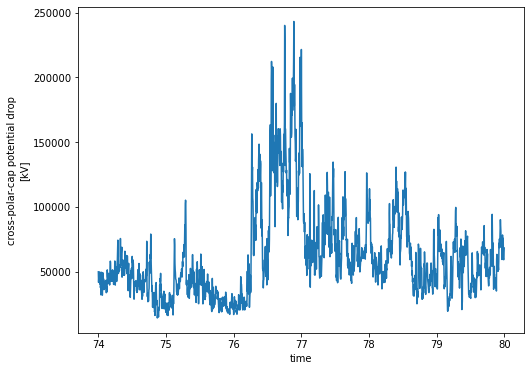

In [22]:
print(nhds.pcp[750])

fig = plt.subplots(figsize=(8, 6))

nhds.pcp.plot()
plt.savefig('pcp_amie.png')

plt.show()

<xarray.DataArray 'hpi' ()>
array(242.301453)
Coordinates:
    time     float64 76.6
Attributes:
    long_name:  hemispheric integrated power
    units:      GW


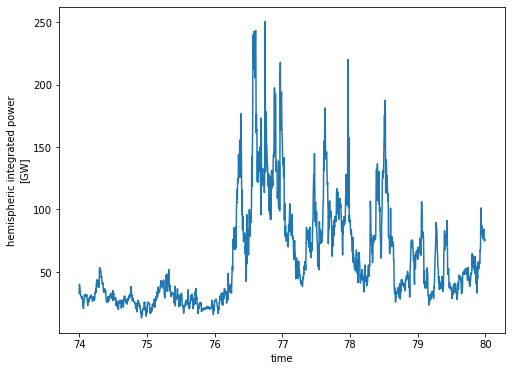

In [23]:
print(nhds.hpi[750])
fig = plt.subplots(figsize=(8, 6))
nhds.hpi.plot()
plt.savefig('hpi_amie.png')

plt.show()

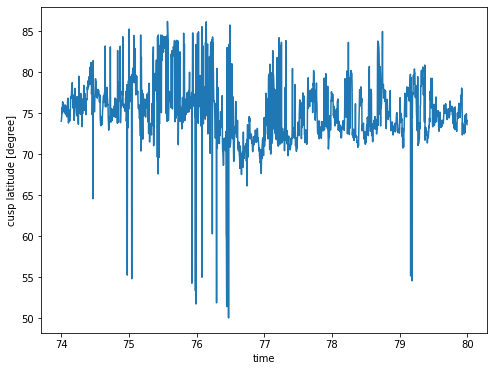

In [24]:
fig = plt.subplots(figsize=(8, 6))
nhds.cusplat.plot()
plt.savefig('cusplat_amie.png')

plt.show()

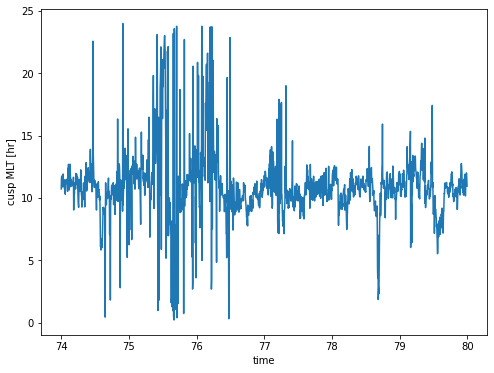

In [25]:
fig = plt.subplots(figsize=(8, 6))
nhds.cuspmlt.plot()
plt.savefig('cusplat_amie.png')

plt.show()

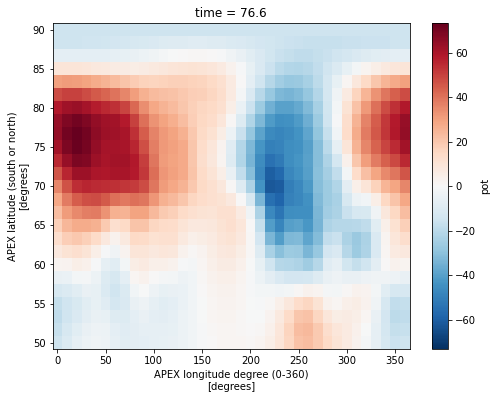

In [26]:
fig = plt.subplots(figsize=(8, 6))

(nhds.pot.isel(time=750)*1e-3).plot()

plt.savefig('pot_amie.png')

plt.show()

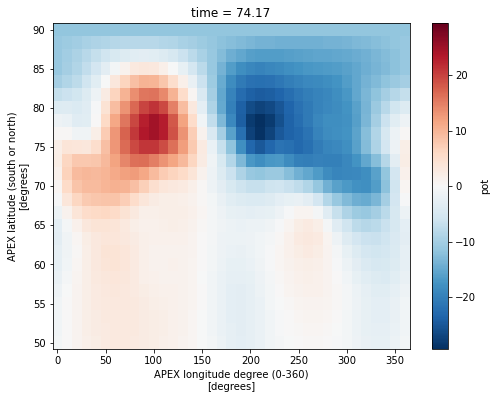

In [27]:
fig = plt.subplots(figsize=(8, 6))

(nhds.pot.isel(time=50)*1e-3).plot()

plt.savefig('pot_amie_t50.png')

plt.show()

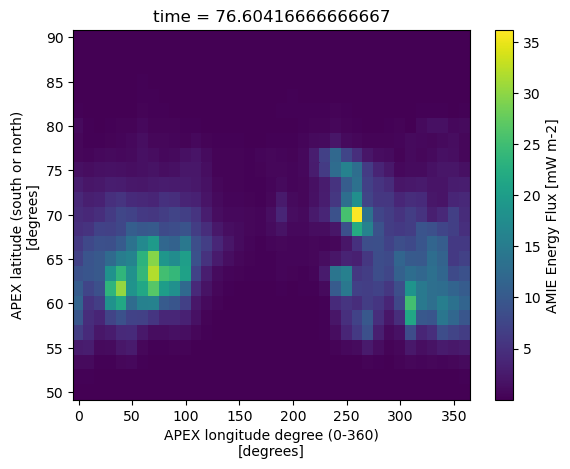

In [114]:
nhds.efx.isel(time=750).plot()
plt.show()

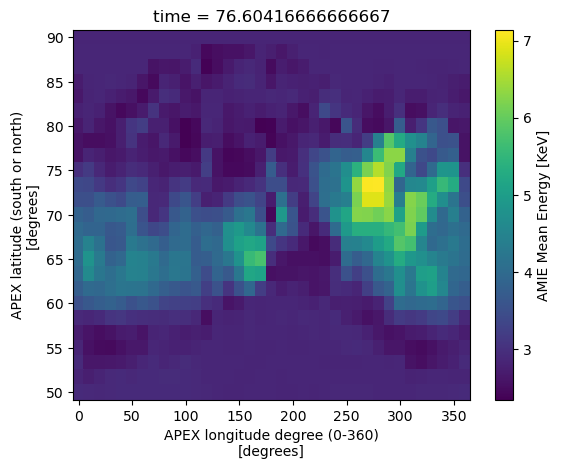

In [115]:
nhds.ekv.isel(time=750).plot()
plt.show()